In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Tourism.csv')

In [3]:
df.shape

(115, 10)

In [4]:
df.tail()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
110,Vadodara Circle,Jama Masjid Saherki Masjid Champaner- Pavagadh,143888,1981,112384,3333,-21.9,68.2,43.0,7.4
111,Vadodara Circle,Buddhist Caves Junagadh,30122,795,40918,1241,35.8,56.1,104.0,1.4
112,Vadodara Circle,"BabaPyara & Khapra Kodiya Caves, Junagarh",343,630,64,0,-81.3,-100.0,104.0,1.5
113,Vadodara Circle,Ashokan Rock Edicts,0,0,0,0,NaN,NaN,NaN,NaN
114,Leh Mini Circle,Leh Palace,37079,7298,43434,7549,17.1,3.4,1.0,NaN


In [5]:
df['Circle'].value_counts()

Delhi Circle          10
Mumbai Circle         10
Agra Circle            8
Hyderabad Circle       8
Chennai Circle         7
Bhopal Circle          7
Dharwad Circle         6
Vadodara Circle        6
Aurangabad Circle      6
Bhubaneswar Circle     5
Lucknow Circle         5
Guwahati Circle        5
Patna Circle           5
Sarnath Circle         4
Bengaluru Circle       4
Srinagar Circle        3
Kolkata Circle         3
Chandigarh Circle      2
Thrissur Circle        2
Hampi Mini Circle      2
Shimla Mini Circle     2
Jodhpur Circle         2
Jaipur Circle          1
Raipur Circle          1
Leh Mini Circle        1
Name: Circle, dtype: int64

In [35]:
df['Circle'] = df['Circle'].map(lambda x: x.rstrip('Circle'))

In [36]:
df.drop(df.tail(2).index,inplace=True)

In [37]:
df.fillna(0,inplace=True)

In [38]:
num_data = df.select_dtypes(exclude='object').columns.tolist()
cat_data = df.select_dtypes(include='object').columns.tolist()

print(num_data)
print(cat_data)

['Domestic - 2016-17', 'Foreign - 2016-17', 'Domestic - 2017-18', 'Foreign - 2017-18', 'Domestic Percentage growth - 2017-18/2016-17', 'Foreign Percentage growth - 2017-18/2016-17', 'Airport(in km)', 'Railway(in km)']
['Circle', 'Name of the Monument']


In [7]:
df.isna().sum()

Circle                                          0
Name of the Monument                            0
Domestic - 2016-17                              0
Foreign - 2016-17                               0
Domestic - 2017-18                              0
Foreign - 2017-18                               0
Domestic Percentage growth - 2017-18/2016-17    1
Foreign Percentage growth - 2017-18/2016-17     2
Airport(in km)                                  1
Railway(in km)                                  2
dtype: int64

In [39]:
# num_data.remove('Railway(in km)')
# num_data.remove('Airport(in km)')

In [40]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,RobustScaler

# pt=PowerTransformer()


# for i in num_data:
#     df[i] = pt.fit_transform(np.array(df[i]).reshape(-1, 1))


In [41]:
df.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra,Taj Mahal,5419608,668403,5663136,794556,4.5,18.9,12.0,6.9
1,Agra,Agra Fort,1799953,441326,2008208,489822,11.6,11.0,11.0,5.0
2,Agra,Akbar's Tomb Sikandara,418502,22389,362070,23638,-13.5,5.6,13.0,12.0
3,Agra,Fatehpur Sikri,427854,126114,962069,301181,124.9,138.8,35.0,37.0
4,Agra,Itimad-ud-Daulah,108392,129177,138524,76572,27.8,-40.7,15.0,9.0


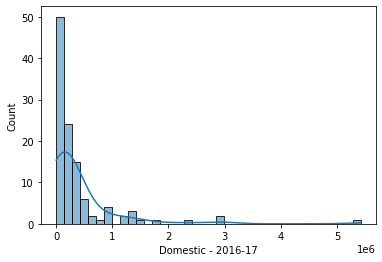

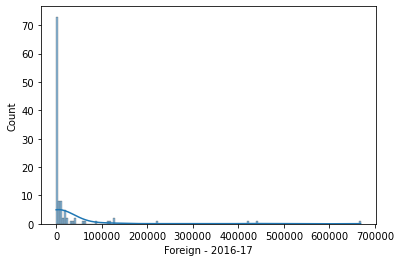

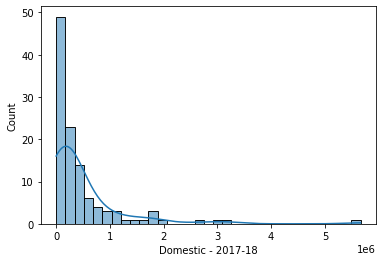

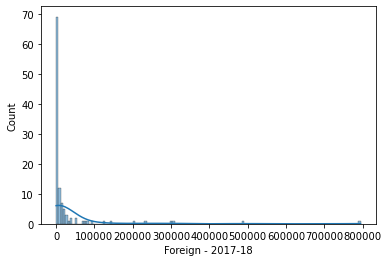

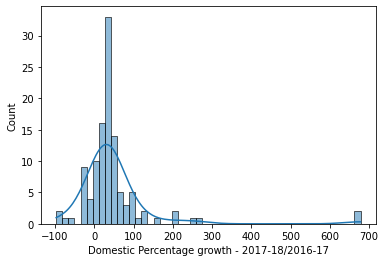

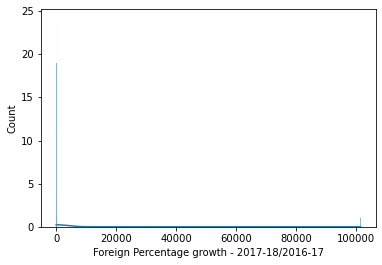

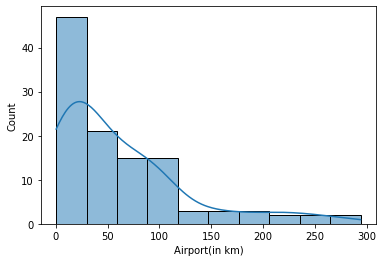

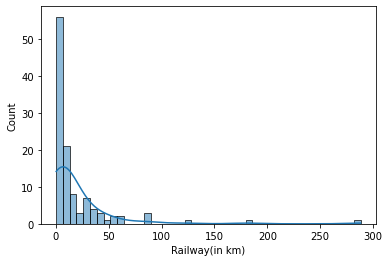

In [42]:
for i in num_data:
    sns.histplot(x=df[i],kde=True)
    plt.xlabel(i)
    plt.show()

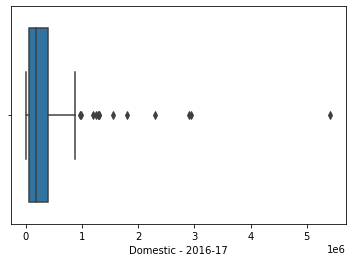

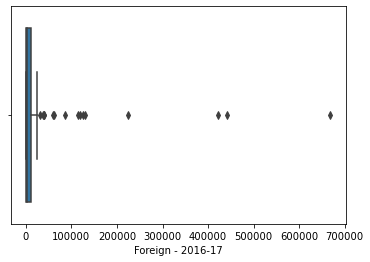

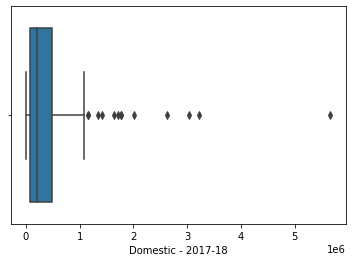

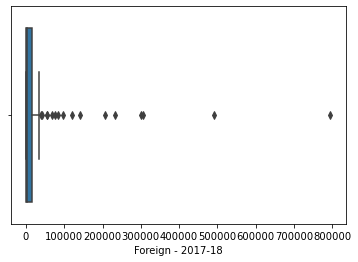

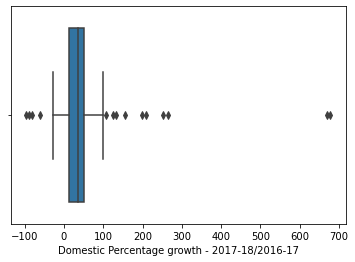

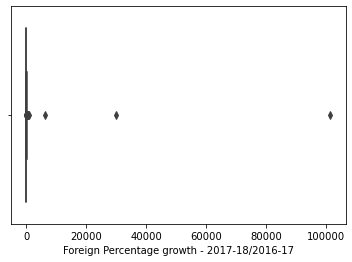

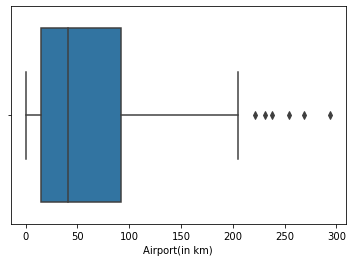

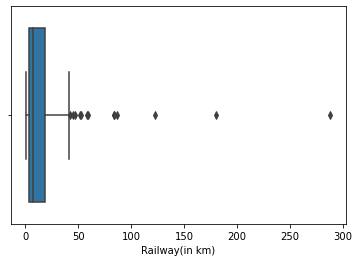

In [43]:
for i in num_data:
    sns.boxplot(x=df[i])
    plt.xlabel(i)
    plt.show()


<AxesSubplot:>

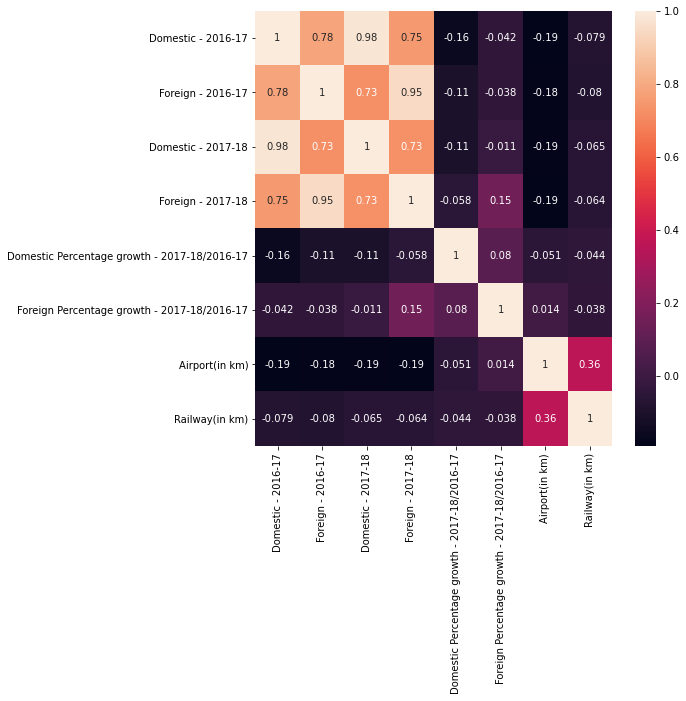

In [44]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

pt = PowerTransformer()
for i in num_data:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))


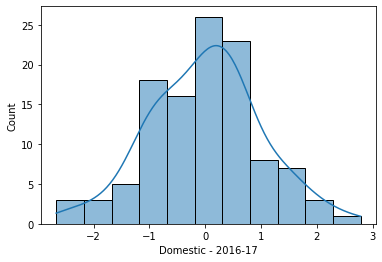

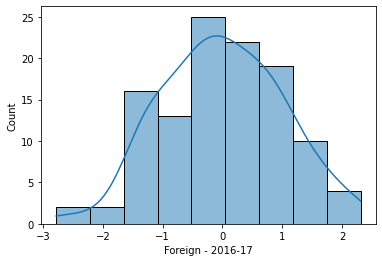

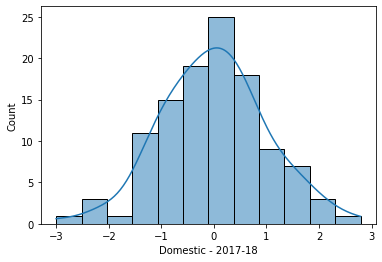

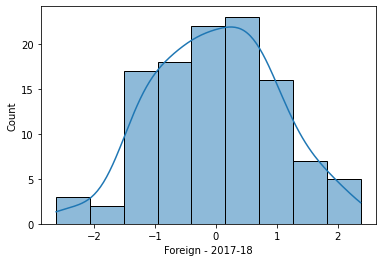

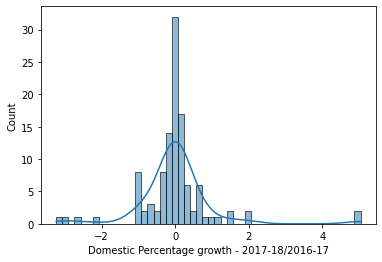

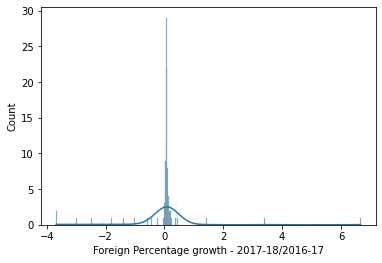

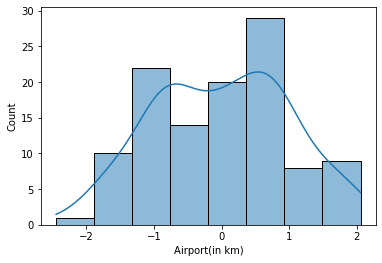

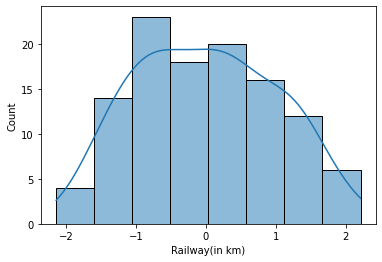

In [46]:
for i in num_data:
    sns.histplot(x=df[i], kde=True)
    plt.xlabel(i)
    plt.show()

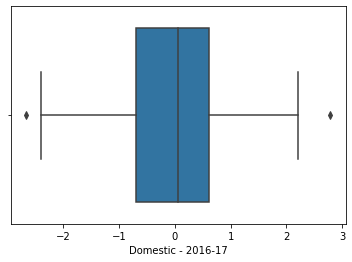

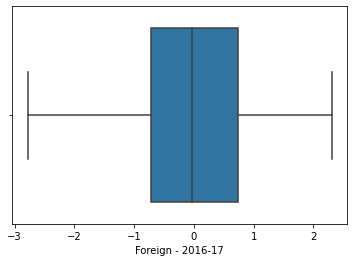

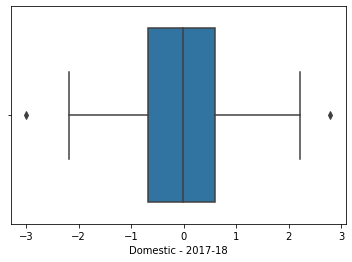

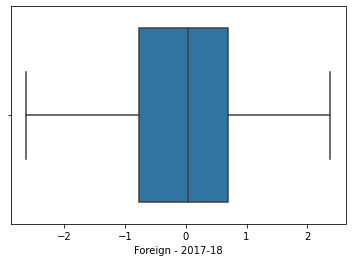

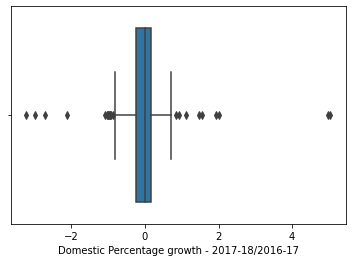

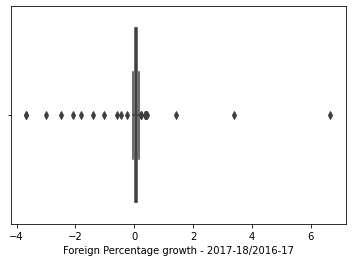

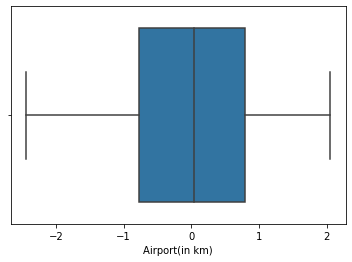

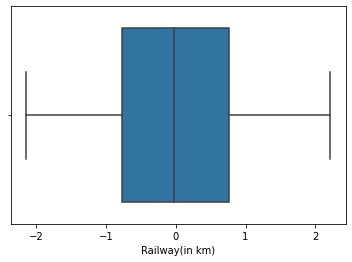

In [47]:
for i in num_data:
    sns.boxplot(x=df[i])
    plt.xlabel(i)
    plt.show()

In [48]:
# X = df[{'Domestic - 2016-17', 'Railway(in km)'}].values

In [49]:
# df.to_csv('Tourism_processed.csv',index=False)